In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import confusion_matrix, make_scorer, RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier import ConfusionMatrix
from pandas.plotting import scatter_matrix
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_selection import SelectPercentile, SelectFromModel
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC

In [12]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/9e/b8/ed5f794359d05cd0bffb894c6418da87b93016ee17b669d55c45d1bd5d5b/tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata (2.6 kB)
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/2f/2f/3c84f675931ce3bcbc7e23acbba1e5d7f05ce769adab48322de57a9f5928/tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl (1.9 kB)
Using cached tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl (276.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


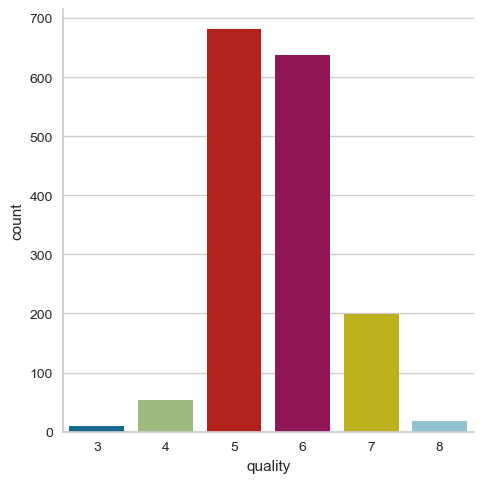

In [15]:
sns.catplot(x = 'quality', data = data , kind = 'count',margin_titles = True)

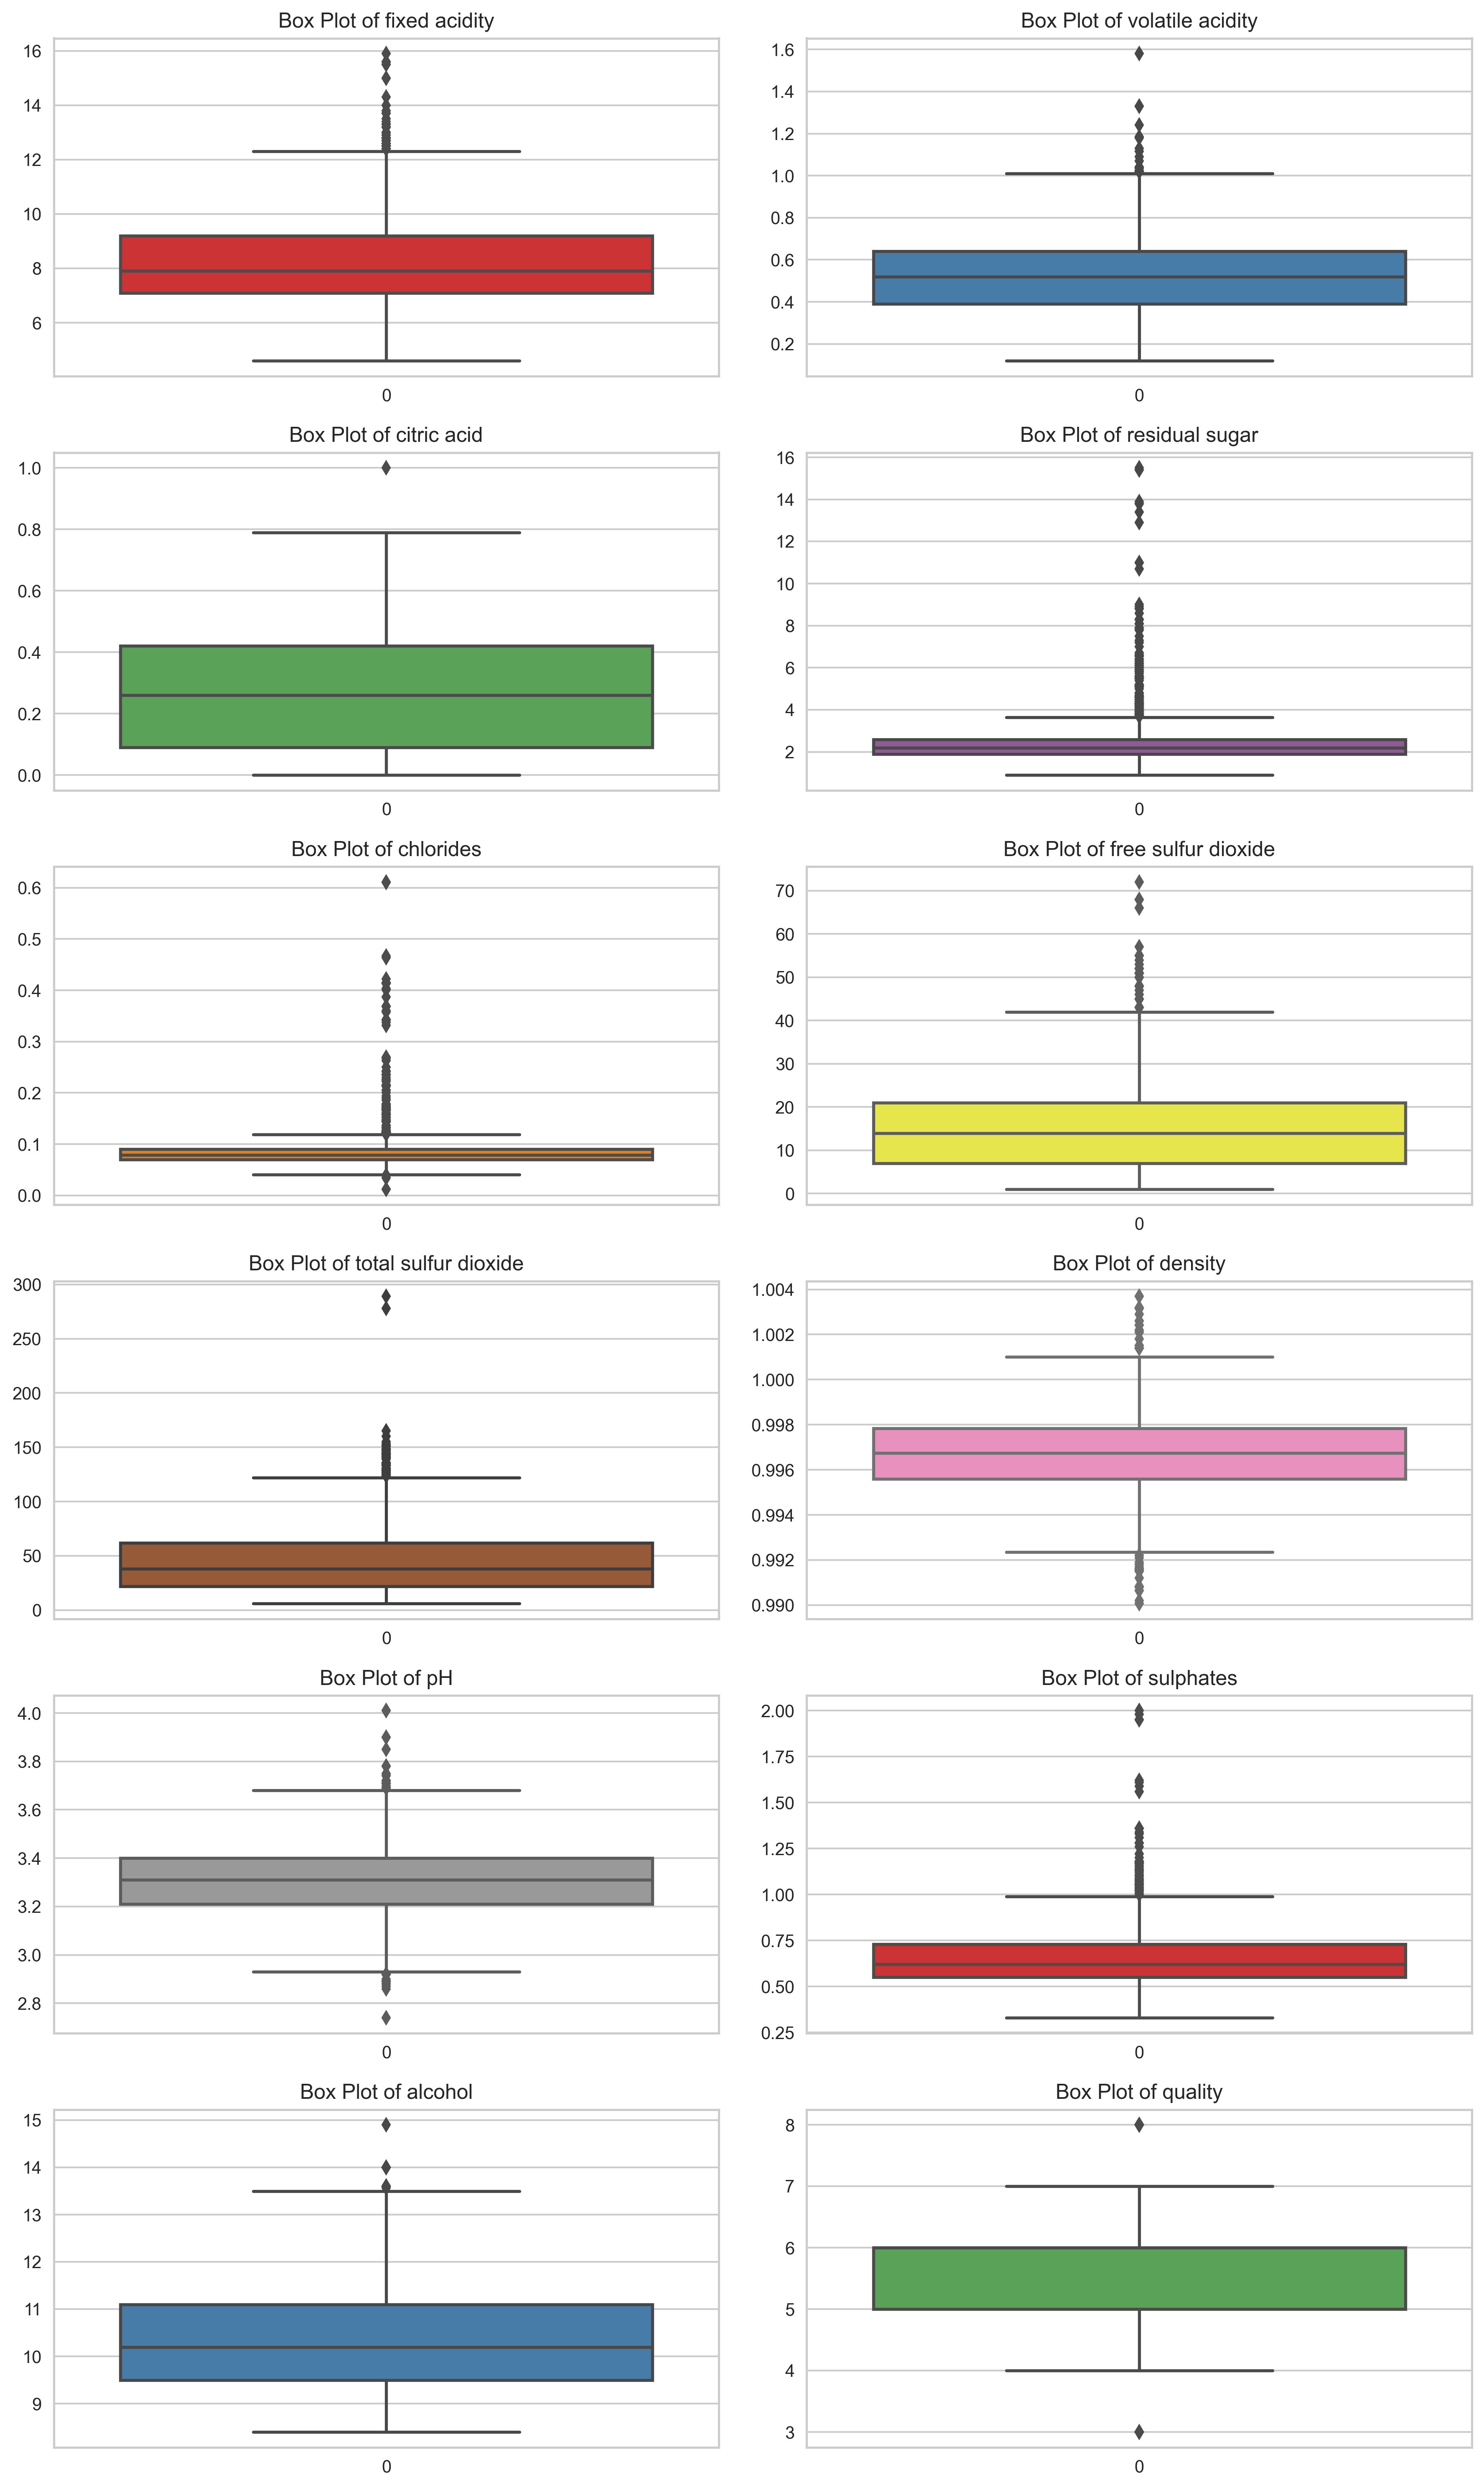

In [25]:
features=data
columns = features.values
num_columns = len(columns)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 20),dpi = 300)

colors = sns.color_palette("Set1", num_columns)
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.boxplot(data=data[column], ax=axes[row, col], color=colors[i])
    axes[row, col].set_title(f'Box Plot of {column}')

if num_columns % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()


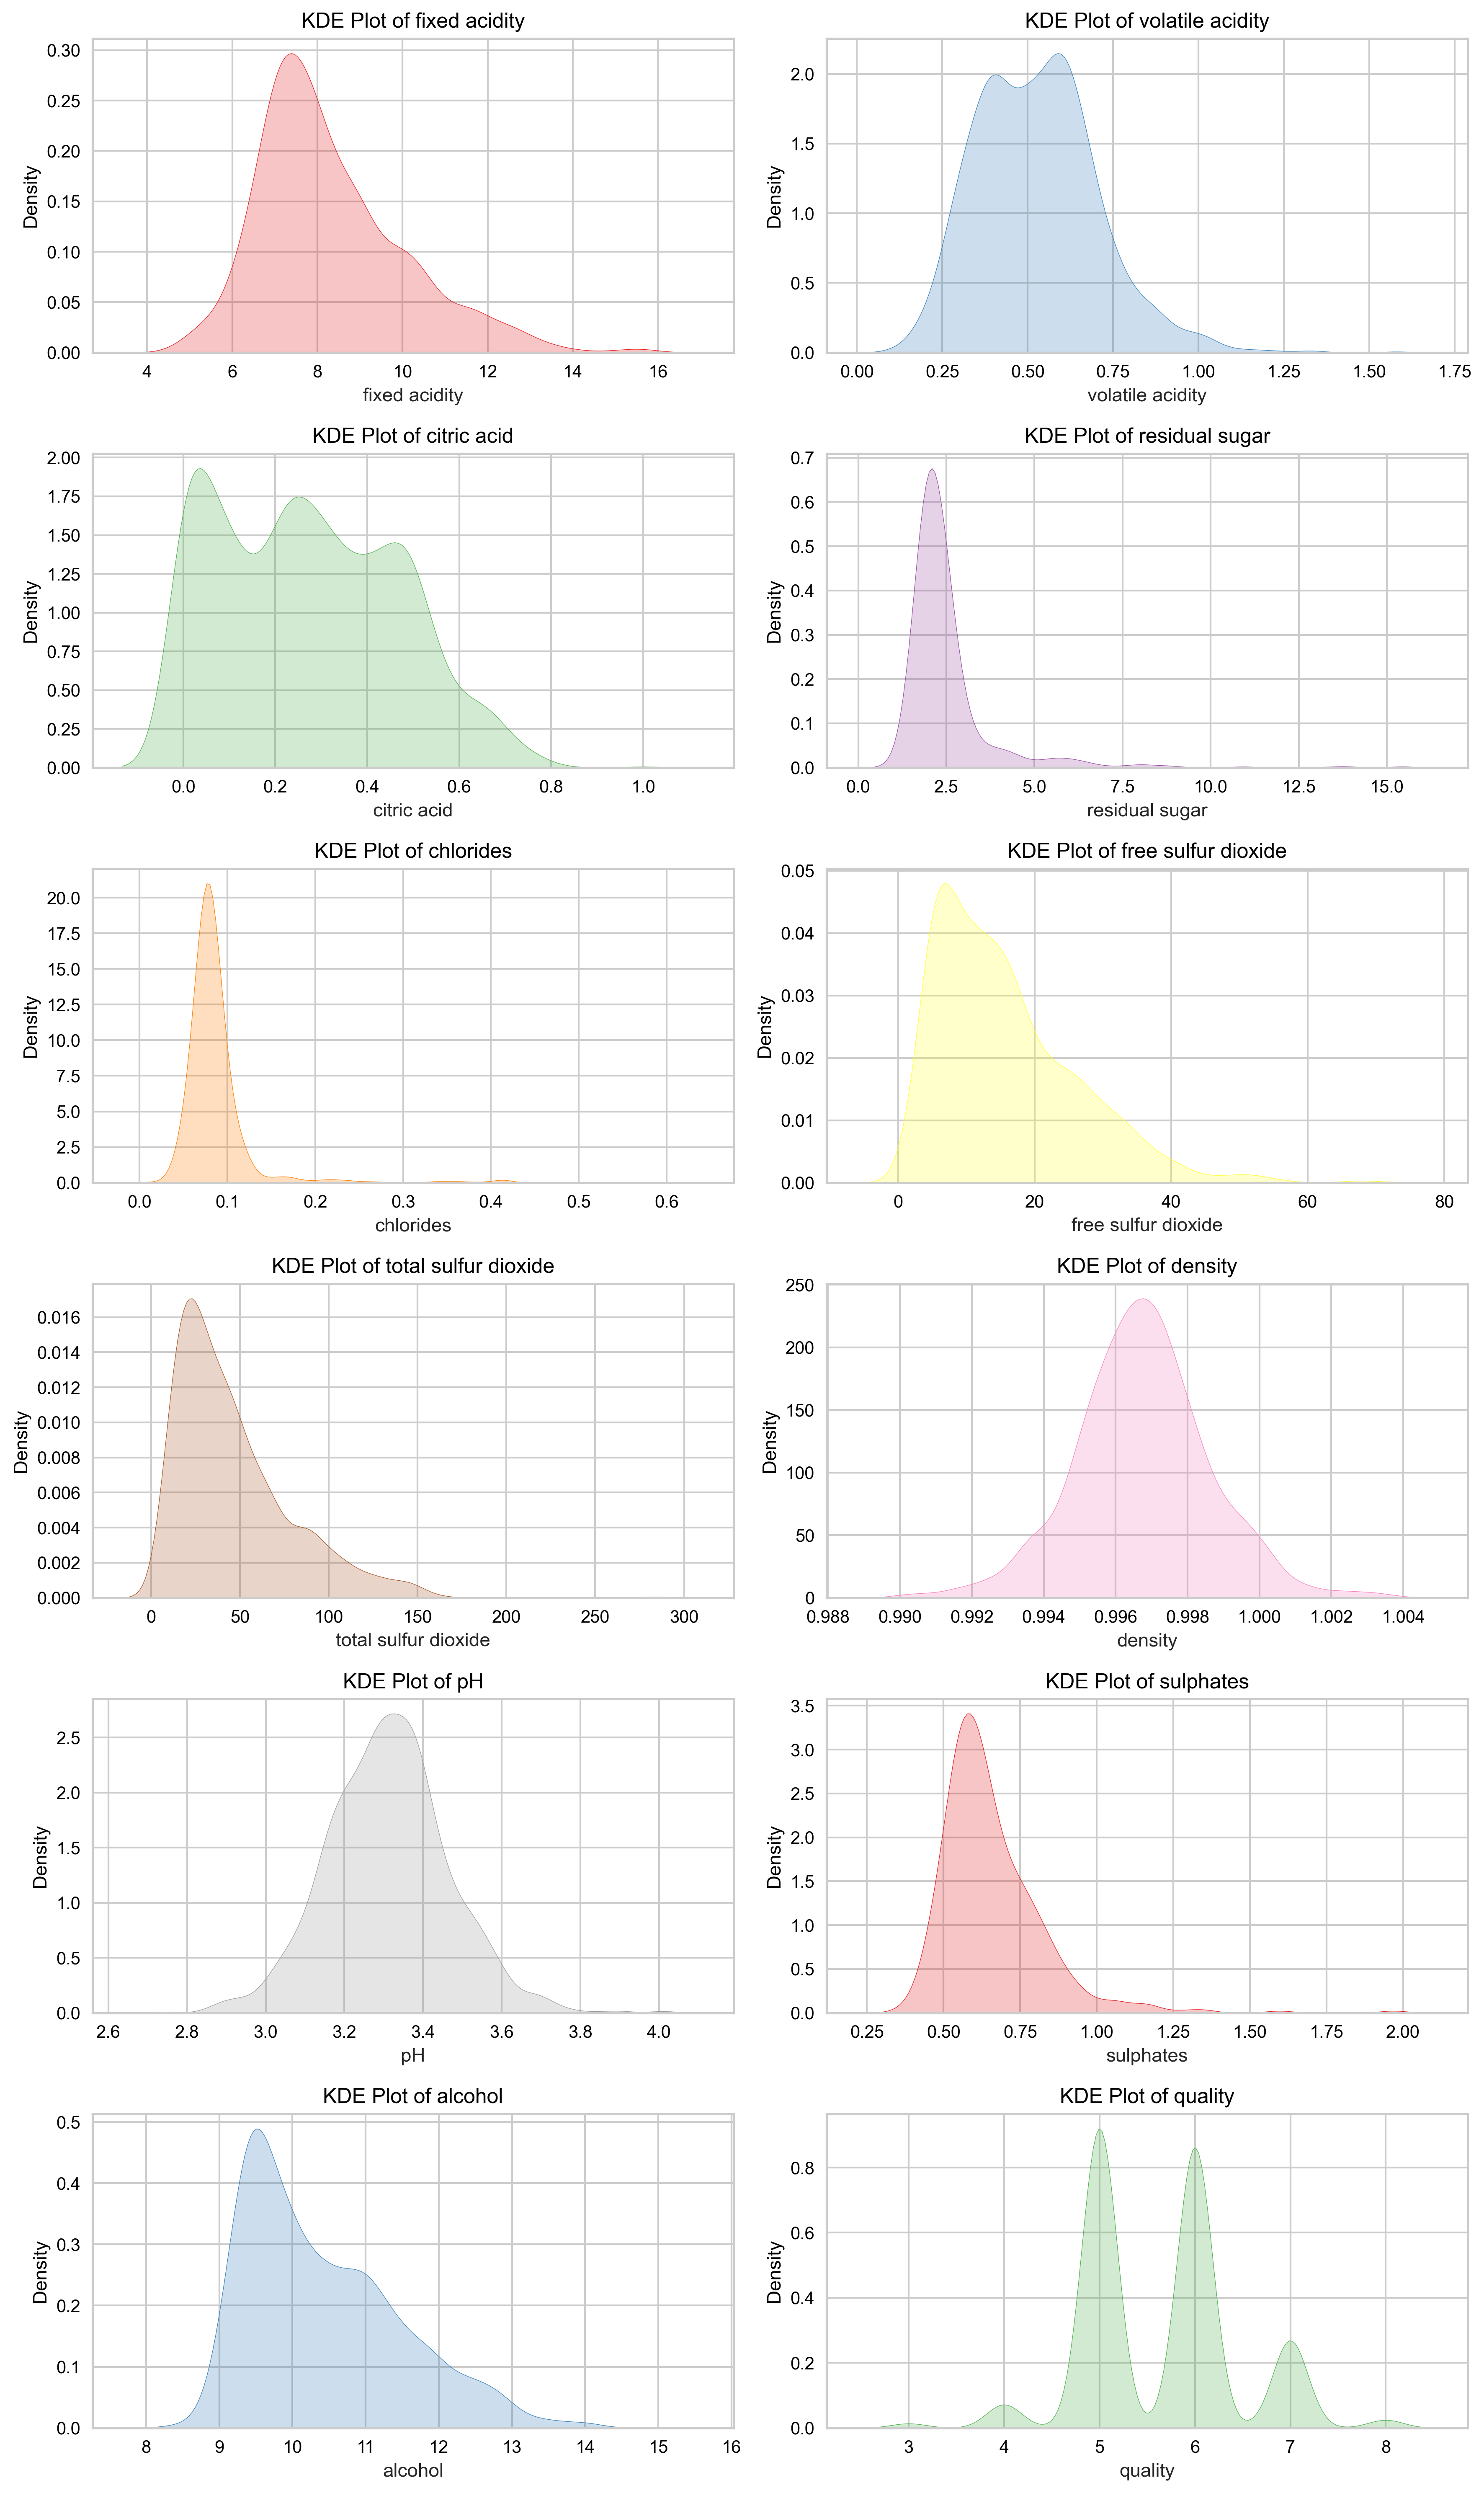

In [26]:
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 20), dpi=300)
label_color = 'black'
title_color = 'black'
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    
    sns.kdeplot(data=data[column], ax=axes[row, col], color=colors[i], fill=True, legend=False)
    axes[row, col].set_ylabel('Density', color=label_color)
    axes[row, col].yaxis.label.set_color(label_color)
    axes[row, col].set_title(f'KDE Plot of {column}', color=title_color)
    
    axes[row, col].tick_params(axis='x', colors=label_color)
    axes[row, col].tick_params(axis='y', colors=label_color)
    axes[row, col].title.set_color(title_color)
    axes[row, col].grid(True)
    
    fig.subplots_adjust(wspace=0.4)

if num_columns % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [28]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [29]:
duplicated = data[data.duplicated()]
duplicated

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [30]:
features = data.columns.drop('quality')
X = data[features]
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
def Percentile_Capping(columns, x_train, y_train, a, b):
    
    outliers=[]
    for col in columns:
        q1=np.percentile(x_train[col], a)
        q2=np.percentile(x_train[col], b)
    
    for i in range(len(x_train)):
        if x_train[col].iloc[i]>q2 or  x_train[col].iloc[i]<q1:
            outliers.append(i)
            
    outliers=set(outliers)    # to remove the duplicate values in the dataset
    outliers=list(outliers)
            
            
    x_train.drop(x_train.index[outliers], inplace=True)   # remove the outliers from the trainin data
    y_train.drop(y_train.index[outliers], inplace=True)
            
    ratio= round(len(outliers)/len(x_train)*100,2)
            
            
    return x_train, y_train, ratio

In [32]:
X_train, y_train, ratio= Percentile_Capping(X_train.columns, X_train, y_train, a=2, b=98)
X_train.shape, y_train.shape

((1255, 11), (1255,))

In [33]:
print(f"Ratio of outliers in the dataset:{ratio}")

Ratio of outliers in the dataset:1.91


In [34]:
scaler = MinMaxScaler()
X_train_tr = scaler.fit_transform(X_train)
X_test_tr = scaler.fit_transform(X_test)

In [35]:
hyperparameters = [{
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10]
}]

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, hyperparameters, scoring='f1_micro', cv=5, verbose=True, n_jobs=-1)
grid_search.fit(X_train_tr, y_train)
best_dt_params = grid_search.best_params_

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [36]:
print(best_dt_params)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [37]:
best_dt = DecisionTreeClassifier(**best_dt_params)
best_dt.fit(X_train_tr, y_train.ravel())
y_pred_dt = best_dt.predict(X_test_tr)
f1 = f1_score(y_test, y_pred_dt, average='micro')
print("F1 Score on Test Set:", f1)

F1 Score on Test Set: 0.421875


In [38]:
print("Accuracy:", accuracy_score(y_test,y_pred_dt))
y_pred_dt_train = best_dt.predict(X_train_tr)
print("Accuracy on train:", accuracy_score(y_train,y_pred_dt_train))

Accuracy: 0.421875
Accuracy on train: 1.0


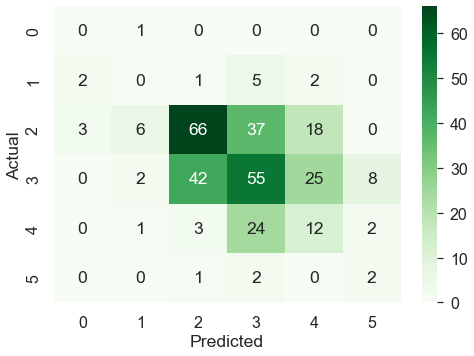

In [39]:
dt_cm = confusion_matrix(y_test, y_pred_dt)
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(dt_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [43]:
lr_params = [{'C': [0.1, 1, 10]}]
lr = LogisticRegression()
lr_grid_search = GridSearchCV(lr, lr_params, scoring='f1_micro', cv=5, verbose=True, n_jobs=-1)
lr_grid_search.fit(X_train_tr, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\Ashish\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10]}], scoring='f1_micro',
             verbose=True)

In [44]:
best_lr_params = lr_grid_search.best_params_
print(best_lr_params)

{'C': 10}


In [46]:
f1_lr = f1_score(y_test, y_pred_lr, average='micro')
print("F1 Score on Test Set (Logistic Regression):", f1_lr)

F1 Score on Test Set (Logistic Regression): 0.565625


In [47]:
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
y_pred_lr_train = best_lr.predict(X_train_tr)
print("Accuracy on train (Logistic Regression):", accuracy_score(y_train, y_pred_lr_train))

Accuracy (Logistic Regression): 0.565625
Accuracy on train (Logistic Regression): 0.6167330677290837


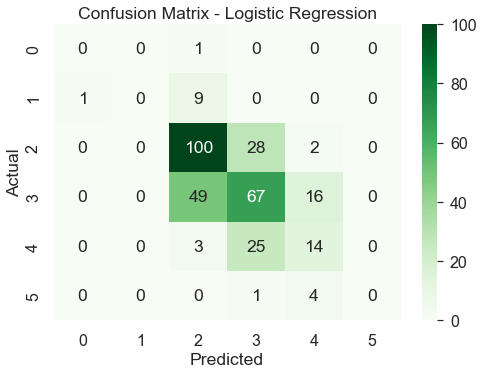

In [48]:
lr_cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(dpi=70)
sns.heatmap(lr_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [49]:
svm_params = [{'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}]
svm = SVC()
svm_grid_search = GridSearchCV(svm, svm_params, scoring='f1_micro', cv=5, verbose=True, n_jobs=-1)
svm_grid_search.fit(X_train_tr, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}],
             scoring='f1_micro', verbose=True)

In [51]:
best_svm_params = svm_grid_search.best_params_
print(best_svm_params)

{'C': 10, 'kernel': 'rbf'}


In [52]:
best_svm = SVC(**best_svm_params)
best_svm.fit(X_train_tr, y_train)
y_pred_svm = best_svm.predict(X_test_tr)
f1_svm = f1_score(y_test, y_pred_svm, average='micro')
print("F1 Score on Test Set (SVM):", f1_svm)

F1 Score on Test Set (SVM): 0.56875


In [53]:
print("Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))
y_pred_svm_train = best_svm.predict(X_train_tr)
print("Accuracy on train (SVM):", accuracy_score(y_train, y_pred_svm_train))

Accuracy (SVM): 0.56875
Accuracy on train (SVM): 0.7274900398406374


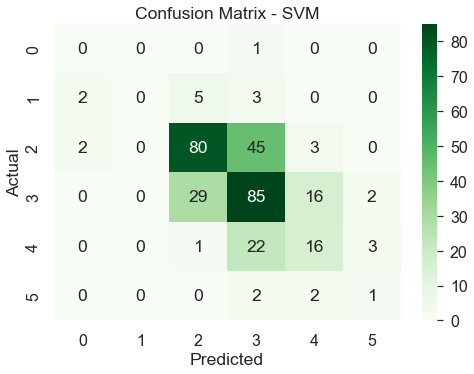

In [54]:
svm_cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(dpi=70)
sns.heatmap(svm_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

In [55]:
hyperparameters = [{
    'n_neighbors': range(3,21,2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}]

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, hyperparameters, scoring='f1_micro', cv=5, verbose=True, n_jobs=-1)
grid_search.fit(X_train_tr, y_train)
best_knn_params = grid_search.best_params_;

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [56]:
best_knn_params

{'n_neighbors': 15, 'p': 2, 'weights': 'distance'}

In [57]:
best_knn = KNeighborsClassifier(**best_knn_params)
best_knn.fit(X_train_tr, y_train.ravel())
y_pred_knn = best_knn.predict(X_test_tr)
print('F1 Score on test data : ', f1_score(y_test, best_knn.predict(X_test_tr), average='micro'))

F1 Score on test data :  0.56875


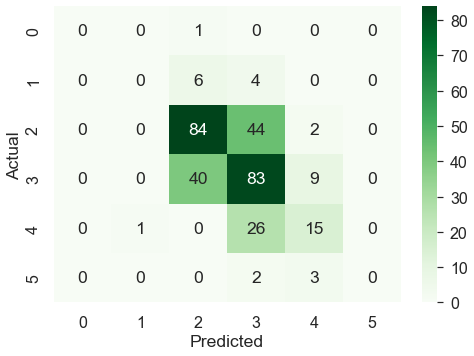

In [58]:
knn_cm = confusion_matrix(y_test, best_knn.predict(X_test_tr))
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(knn_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [59]:
hyperparameters = [{
    'n_estimators': range(10,120,10),
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10],
    'max_features':[2,3,4]
}]

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, hyperparameters, scoring='f1_micro', cv=5, verbose=True, n_jobs=-1)
grid_search.fit(X_train_tr, y_train)


Fitting 5 folds for each of 198 candidates, totalling 990 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 5, 10], 'max_features': [2, 3, 4],
                          'n_estimators': range(10, 120, 10)}],
             scoring='f1_micro', verbose=True)

In [60]:
best_rf_params = grid_search.best_params_
print(best_rf_params)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 4, 'n_estimators': 70}


In [61]:
best_rf = RandomForestClassifier(**best_rf_params)
best_rf.fit(X_train_tr, y_train.ravel())
y_pred_rf = best_rf.predict(X_test_tr)
f1 = f1_score(y_test, y_pred_rf, average='micro')
print("F1 Score on Test Set:", f1)

F1 Score on Test Set: 0.575


In [62]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
y_pred_rf_train = best_rf.predict(X_train_tr)
print("Accuracy on train:", accuracy_score(y_train, y_pred_rf_train))

Accuracy: 0.575
Accuracy on train: 0.9745019920318725


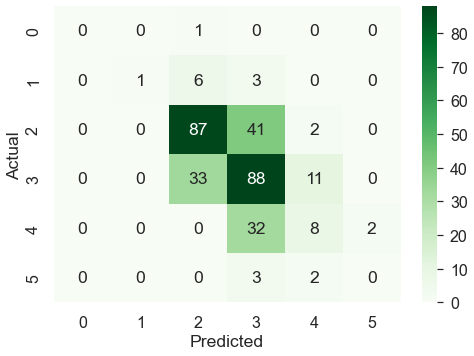

In [63]:
rf_cm = confusion_matrix(y_test, y_pred_rf)
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(rf_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [64]:
accuracy_scores = {}

accuracy_scores['Random Forest'] = accuracy_score(y_test, y_pred_rf)
accuracy_scores['Decision Tree'] = accuracy_score(y_test, y_pred_dt)
accuracy_scores['K-Nearest Neighbors'] = accuracy_score(y_test, y_pred_knn)
accuracy_scores['Logistic Regression'] = accuracy_score(y_test, y_pred_lr)
accuracy_scores['SVM'] = accuracy_score(y_test, y_pred_svm)


best_method = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_method]

for method, accuracy in accuracy_scores.items():
    print(f"{method}: {accuracy}")

print(f"\nBest Method: {best_method}")
print(f"Accuracy: {best_accuracy}")

Random Forest: 0.575
Decision Tree: 0.421875
K-Nearest Neighbors: 0.56875
Logistic Regression: 0.565625
SVM: 0.56875

Best Method: Random Forest
Accuracy: 0.575


In [65]:
f1_scores = {}

f1_scores['Random Forest'] = f1_score(y_test, y_pred_rf, average='micro')
f1_scores['Decision Tree'] = f1_score(y_test, y_pred_dt, average='micro')
f1_scores['K-Nearest Neighbors'] = f1_score(y_test, y_pred_knn, average='micro')
f1_scores['Logistic Regression'] = f1_score(y_test, y_pred_lr, average='micro')
f1_scores['SVM'] = f1_score(y_test, y_pred_svm, average='micro')

best_method = max(f1_scores, key=f1_scores.get)
best_f1_score = f1_scores[best_method]

for method, f1 in f1_scores.items():
    print(f"{method}: {f1}")

print(f"\nBest Method: {best_method}")
print(f"Best F1 Score: {best_f1_score}")

Random Forest: 0.575
Decision Tree: 0.421875
K-Nearest Neighbors: 0.56875
Logistic Regression: 0.565625
SVM: 0.56875

Best Method: Random Forest
Best F1 Score: 0.575
